In [1]:
import yfinance as yf

msft = yf.Ticker("MSFT")
print(msft)
"""
returns
<yfinance.Ticker object at 0x1a1715e898>
"""

# get stock info
msft.info

yfinance.Ticker object <MSFT>


{'zip': '98052-6399',
 'sector': 'Technology',
 'fullTimeEmployees': 181000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. Its Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and desktop solutions; and training and certifica

In [2]:
data = msft.history(period="max")

In [3]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.055898,0.064119,0.055898,0.061378,1031788800,0.0,0.0
1986-03-14,0.061378,0.064667,0.061378,0.063570,308160000,0.0,0.0
1986-03-17,0.063570,0.065215,0.063570,0.064667,133171200,0.0,0.0
1986-03-18,0.064667,0.065215,0.062474,0.063022,67766400,0.0,0.0
1986-03-19,0.063022,0.063570,0.061378,0.061926,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2022-01-10,309.489990,314.720001,304.690002,314.269989,44244500,0.0,0.0
2022-01-11,313.380005,316.609985,309.890015,314.980011,29386800,0.0,0.0
2022-01-12,319.670013,323.410004,317.079987,318.269989,34372200,0.0,0.0


In [4]:
df = data.copy()

In [5]:
import os
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np
from nsepy import get_history
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
data.reset_index(level=0, inplace=True)

In [6]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.055898,0.064119,0.055898,0.061378,1031788800,0.0,0.0
1986-03-14,0.061378,0.064667,0.061378,0.063570,308160000,0.0,0.0
1986-03-17,0.063570,0.065215,0.063570,0.064667,133171200,0.0,0.0
1986-03-18,0.064667,0.065215,0.062474,0.063022,67766400,0.0,0.0
1986-03-19,0.063022,0.063570,0.061378,0.061926,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2022-01-10,309.489990,314.720001,304.690002,314.269989,44244500,0.0,0.0
2022-01-11,313.380005,316.609985,309.890015,314.980011,29386800,0.0,0.0
2022-01-12,319.670013,323.410004,317.079987,318.269989,34372200,0.0,0.0


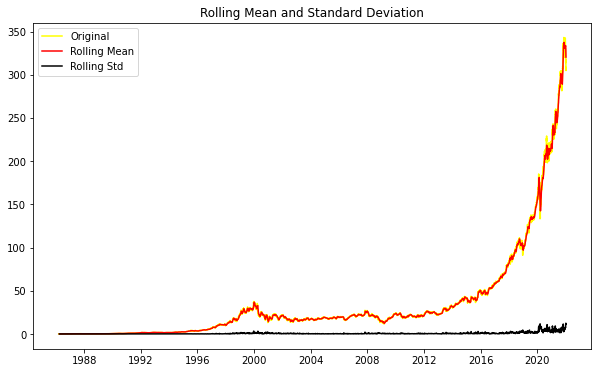

Results of dickey fuller test
Test Statistics                   9.333997
p-value                           1.000000
No. of lags used                 35.000000
Number of observations used    9000.000000
critical value (1%)              -3.431077
critical value (5%)              -2.861861
critical value (10%)             -2.566941
dtype: float64


In [9]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='yellow',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(data.Close)

<Figure size 720x432 with 0 Axes>

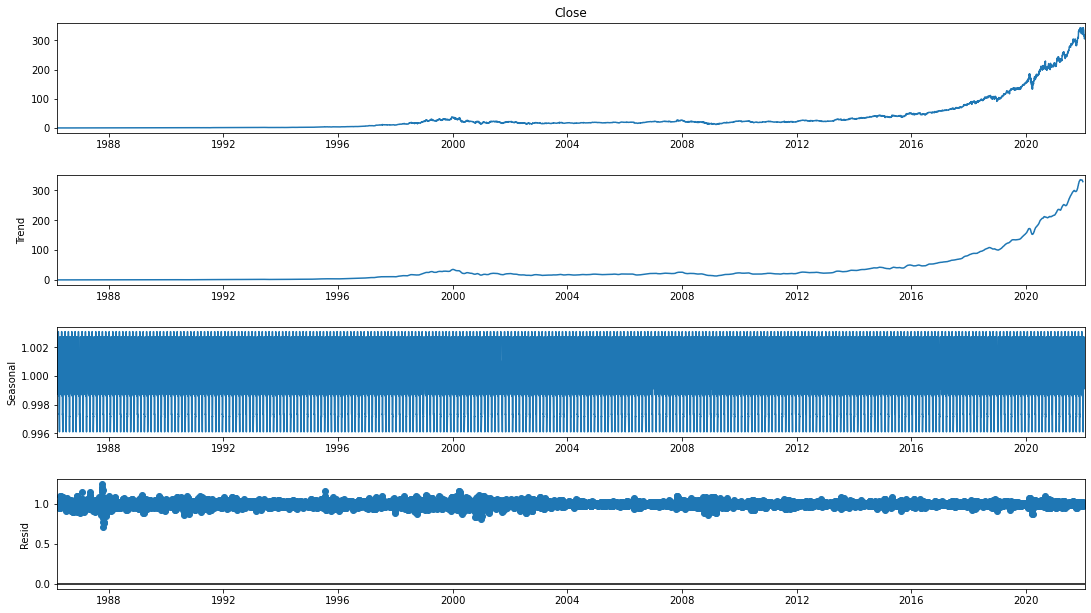

In [10]:
result = seasonal_decompose(data.Close, model='multiplicative', freq = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


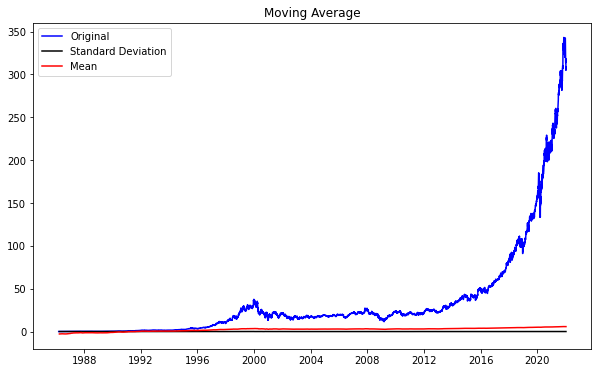

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(data['Close'])
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(data["Close"], color ="blue", label = "Original")
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

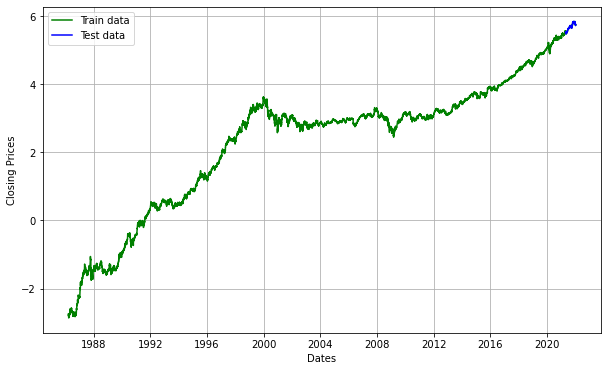

In [34]:
train_data, test_data = df_log[3:int(len(df_log)*0.98)], df_log[int(len(df_log)*0.98):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [23]:
df_log[3:int(len(df_log)*0.89)]

Date
1986-03-18   -2.764266
1986-03-19   -2.781810
1986-03-20   -2.808715
1986-03-21   -2.836365
1986-03-24   -2.864801
                ...   
2018-01-30    4.479074
2018-01-31    4.503256
2018-02-01    4.495331
2018-02-02    4.468668
2018-02-05    4.426611
Name: Close, Length: 8039, dtype: float64

In [25]:
df_log[int(len(df_log)*0.89):]

Date
2018-02-06    4.463753
2018-02-07    4.444741
2018-02-08    4.392043
2018-02-09    4.428654
2018-02-12    4.439370
                ...   
2022-01-10    5.750252
2022-01-11    5.752509
2022-01-12    5.762900
2022-01-13    5.719656
2022-01-14    5.731236
Name: Close, Length: 994, dtype: float64

In [35]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
test='adf',       # use adftest to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1,              # frequency of series
d=None,           # let model determine 'd'
seasonal=False,   # No Seasonality
start_P=0, 
D=0, 
trace=True,
error_action='ignore',  
suppress_warnings=True, 
stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-42839.020, Time=3.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-42840.040, Time=1.94 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-42840.278, Time=4.83 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-42824.258, Time=0.79 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-42838.154, Time=7.75 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-42851.249, Time=6.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-42857.548, Time=4.57 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-42855.044, Time=5.34 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-42856.314, Time=7.76 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-42855.719, Time=9.99 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-42847.714, Time=6.30 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-42852.726, Time=8.11 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-42838.695, Time=1.23 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 67.841 sec

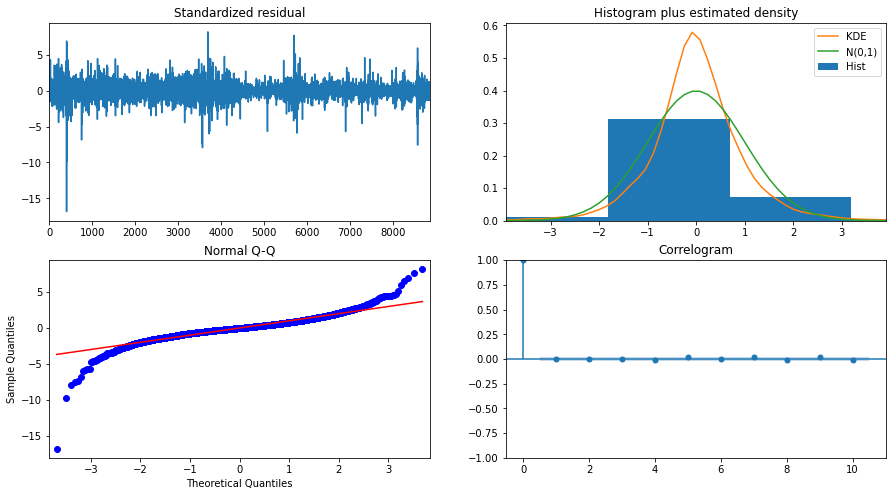

In [36]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [37]:
model = ARIMA(train_data, order=(3, 1, 2))
fitted = model.fit(disp=-1)
print(fitted.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 8851
Model:                 ARIMA(3, 1, 2)   Log Likelihood               21435.006
Method:                       css-mle   S.D. of innovations              0.021
Date:                Fri, 14 Jan 2022   AIC                         -42856.011
Time:                        23:40:19   BIC                         -42806.393
Sample:                             1   HQIC                        -42839.114
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0009      0.000      4.527      0.000       0.001       0.001
ar.L1.D.Close     0.8551      0.339      2.525      0.012       0.191       1.519
ar.L2.D.Close    -0.3684      0.235     

In [40]:
fc, se, conf = fitted.forecast(181, alpha=0.05)  # 95% confidence

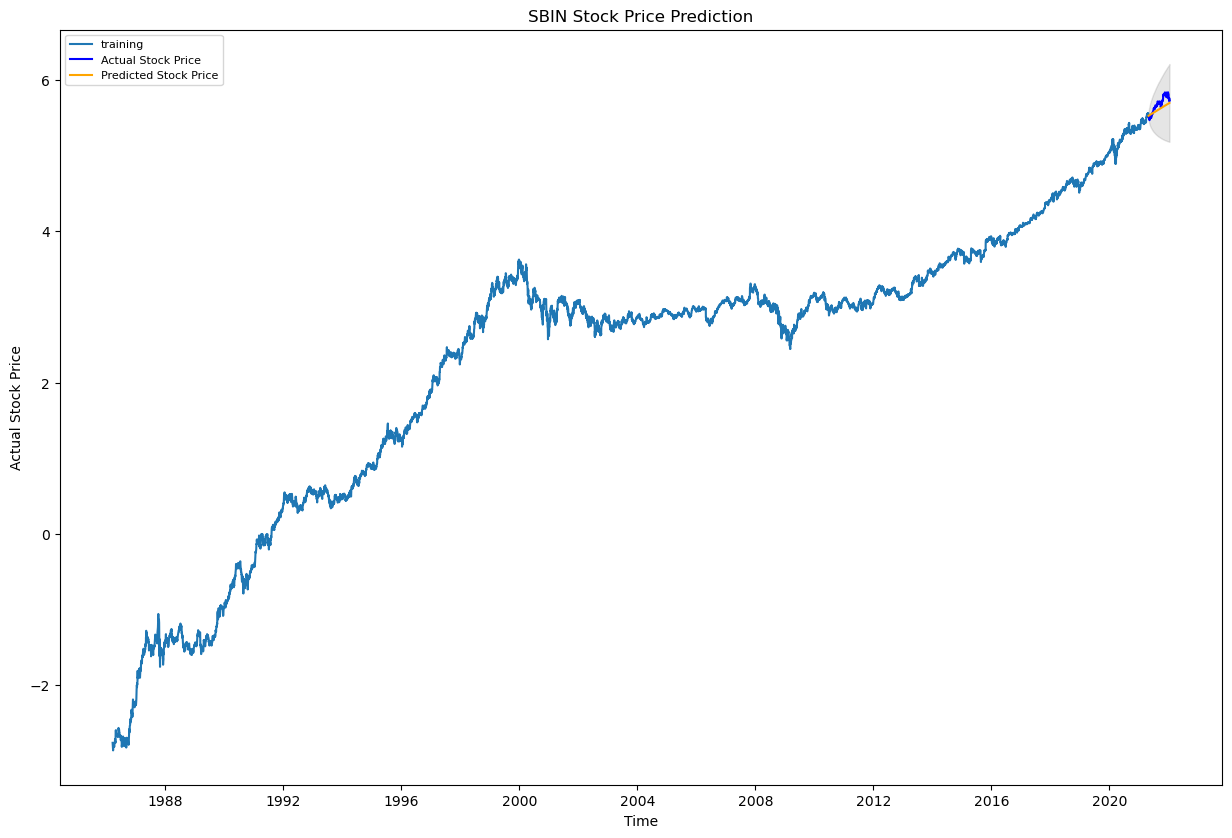

In [43]:
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(15,10), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('SBIN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()